# Hands-on Introduction to Regular Expressions

### DATA 601



Further Reading:

For a 'Pythonic' introduction to regular expressions, please see:   
- [Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html), a Python HOWTO by *A.M. Kuchling*.
- [Regular expression operations](https://docs.python.org/3/library/re.html), official documentation of the `re` module.



## Bit of Background

- Informally, a regular expression (a.k.a regex or regexp) is a way to specify a pattern that is to be searched for within a string. 
- Formally, they are studied in theoretical computer science in sub-areas that are cocerned with the syntax and semantics of (programming) languages (formal language theory, compilers etc.).
- Many programming languages (including Python) are able to efficiently search within strings via the use of regular expressions. This is usually done at a lower-level via a regular expression engine.
- The Unix operating system comes with various text processing utilities that support regular expressions (e.g. sed, awk, grep). This means that a lot of text processing can be done at the OS level to clean/organize data.
- Again, our focus is on the use of regular expressions and we won't be concerned with the internals of how the matching is actually performed.

## Raw Strings in Python

- The backslash character (`\`) in Python strings has a special meaning; it is used as an escape character, and is also used to specify special characters (such as the newline characters`\n` or the tab character `\t`).   
  E.g. if we wanted a quote character (`'`) inside a string that is also demarcated via single quotes (`'...'`), we'd need to escape it:  
  `'Python's magic'` (incorrect) vs. `'Python\'s magic'` (correct). 
- What if we want a backslash character (`\`) in a string? One way to do that would be to escape it via another backslash, so we'd type `'\\'`.
- Another method is to use _raw strings_. This is done by preceding the string with an `r`. In a raw string, a backslash is interpreted as a normal character rather than an escape character.
- Regular expressions make heavy use of the backslash character. In order to avoid escaping it every time one wants to use it, and __for better readability__, it is more convenient to use raw strings. 
- For more details, please see the [Literals](https://docs.python.org/3/reference/lexical_analysis.html#literals) section in the Python Language Reference.

In [1]:
# Regular vs. raw strings

print( 'This is a regular string with two backslash \\\\ characters' )
print( r"This is a raw string with two backslash \\ characters" )
print("\n")
 
print( "A backslash followed by an n in a regular string is treated as a newline character \n newline" )
print( r"A backslash followed by an n in a raw string is treated as two separate characters \n" )


This is a regular string with two backslash \\ characters
This is a raw string with two backslash \\ characters


A backslash followed by an n in a regular string is treated as a newline character 
 newline
A backslash followed by an n in a raw string is treated as two separate characters \n


In [2]:
# Simple character/string matching

# The simplest match is to look for a substring within a string.

import re

str = "The quick brown fox jumps over the lazy dog"
pattern = r'the'

print( re.findall( pattern, str) ) # case sensitive
print( re.findall( pattern, str, flags=re.IGNORECASE) ) # case insensitive

# We can also replace the substring
# print( re.sub(pattern, '---', str ) )
# print( re.sub(pattern, '---', str, flags=re.IGNORECASE) )

['the']
['The', 'the']


## Metacharacters

- More interesting patterns are specified via the following metacharacters which are put together to form regular expressions.

  - `.` - match any character except for the new line character.
  - `[ ]` - will match a class of characters (alphabets, numbers, ranges etc.),
  - `\` - used to specify a class of special characters (whitespace, non-whitespace etc.),
  - `*` - used to match _zero_ or more occurrences of a pattern,
  - `+` - used to match _one_ or more occurrences of a pattern.,
  - `?` - match either zero times or once, 
  - `{ }` - used to specify the number of occurrences (at least and at most),
  - `|` - 'OR' operator,
  - `^` - match at the beginning of string (or lines), also used at the beginning of class specification (`[ ]`) to indicate a complement,
  - `$` - match at the end of string (or lines),
  - `( )` - used for grouping matches that can then be further processed.

In [3]:
# Let's look at some examples of matching - first without repetitions

str = '''This is an example
of a multi_line (multiline)
string  that  spans
FOUR (4) lines.
'''

print( re.findall(r'.', str) )
print("\n")
#print( re.findall(r'.', str, flags=re.DOTALL) ) # make '.' match newline characters also
#print( "\n" )
#print( re.findall(r'\.', str) ) # Need to escape when matching a metacharacter 
#print("\n")

print( re.findall(r'multi_?line', str) )
print( "\n" )


print(re.findall( r'[A-Z]' , str ) ) # Any uppercase character
#print(re.findall( r'[A-Z][A-Z]', str ) ) # Two consecutive upper-case characters.
#print(re.findall( r'.[0-9].', str  ) ) # Any numeric character along-with the previous and next characters

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', 'n', ' ', 'e', 'x', 'a', 'm', 'p', 'l', 'e', 'o', 'f', ' ', 'a', ' ', 'm', 'u', 'l', 't', 'i', '_', 'l', 'i', 'n', 'e', ' ', '(', 'm', 'u', 'l', 't', 'i', 'l', 'i', 'n', 'e', ')', 's', 't', 'r', 'i', 'n', 'g', ' ', ' ', 't', 'h', 'a', 't', ' ', ' ', 's', 'p', 'a', 'n', 's', 'F', 'O', 'U', 'R', ' ', '(', '4', ')', ' ', 'l', 'i', 'n', 'e', 's', '.']


['multi_line', 'multiline']


['T', 'F', 'O', 'U', 'R']


### `[ ]` (Character Class) → Matches Any One Character from the Set

Square brackets (`[ ]`) allow defining a set of characters to match.




In [4]:
print(re.findall("[aeiou]", "hello world"))


['e', 'o', 'o']


Ranges can be specified inside [ ]:

In [5]:
print(re.findall("[a-z]", "Python3"))  # Matches lowercase letters
print(re.findall("[0-9]", "Year 2024"))  # Matches digits


['y', 't', 'h', 'o', 'n']
['2', '0', '2', '4']


Negation (^) inside [ ]:


In [6]:
print(re.findall("[^aeiou]", "hello"))  # Matches everything except vowels
# Output: ['h', 'l', 'l']


['h', 'l', 'l']


### `\` (Backslash) → Used for Special Character Classes

Backslash (`\`) is used for predefined character sets:

| Pattern | Description |
|---------|-------------|
| `\d` | Matches any digit (0-9) |
| `\D` | Matches any non-digit |
| `\s` | Matches whitespace (space, tab, newline) |
| `\S` | Matches non-whitespace |
| `\w` | Matches word characters (letters, numbers, underscore) |
| `\W` | Matches non-word characters |




#### `\d` → Matches any digit (0-9)

In [7]:

print(re.findall("\d", "Phone number: 123-456-7890"))


['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_16443/2757590916.py:1: SyntaxWarning: invalid escape sequence '\d'
  print(re.findall("\d", "Phone number: 123-456-7890"))


#### \D → Matches any non-digi

In [10]:
print(re.findall("\D", "Room 305B"))


['R', 'o', 'o', 'm', ' ', 'B']


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_16443/1544328276.py:1: SyntaxWarning: invalid escape sequence '\D'
  print(re.findall("\D", "Room 305B"))


####  \s → Matches whitespace (space, tab, newline)

In [12]:
print(re.findall("\s", "Hello World!\nNew Line"))

[' ', '\n', ' ']


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_16443/3404335720.py:1: SyntaxWarning: invalid escape sequence '\s'
  print(re.findall("\s", "Hello World!\nNew Line"))


#### \S → Matches non-whitespace

In [14]:
print(re.findall("\S", "Hello World!\nNew Line"))


['H', 'e', 'l', 'l', 'o', 'W', 'o', 'r', 'l', 'd', '!', 'N', 'e', 'w', 'L', 'i', 'n', 'e']


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_16443/3336169036.py:1: SyntaxWarning: invalid escape sequence '\S'
  print(re.findall("\S", "Hello World!\nNew Line"))


#### \w → Matches word characters (letters, numbers, underscore)

In [16]:
print(re.findall("\w", "Python_3.9 is cool!"))
# Output: ['P', 'y', 't', 'h', 'o', 'n', '_', '3', '9', 'i', 's', 'c', 'o', 'o', 'l']


['P', 'y', 't', 'h', 'o', 'n', '_', '3', '9', 'i', 's', 'c', 'o', 'o', 'l']


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_16443/1304716139.py:1: SyntaxWarning: invalid escape sequence '\w'
  print(re.findall("\w", "Python_3.9 is cool!"))


#### \W → Matches non-word characters

In [17]:
print(re.findall("\W", "Python_3.9 is cool!"))
# Output: ['.', ' ', ' ', '!']


['.', ' ', ' ', '!']


<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_16443/2662696083.py:1: SyntaxWarning: invalid escape sequence '\W'
  print(re.findall("\W", "Python_3.9 is cool!"))


#### `*` (Asterisk) → Matches Zero or More Occurrences

The asterisk (`*`) allows matching the preceding character **zero or more times**.

In [19]:
print(re.findall("ca*t", "ct cat caat caaat"))  
# Output: ['ct', 'cat', 'caat', 'caaat'] (matches 'c' followed by zero or more 'a', and 't')


['ct', 'cat', 'caat', 'caaat']


####  `+` (Plus) → Matches One or More Occurrences

The plus sign (`+`) allows matching the preceding character **one or more times** (unlike `*`, which allows zero or more matches).


In [20]:
print(re.findall("ca+t", "ct cat caat caaat"))  


['cat', 'caat', 'caaat']


####  `?` (Question Mark) → Matches Zero or One Time

The question mark (`?`) means that the preceding character or pattern is **optional** (i.e., it can appear either **zero or one time**).


In [21]:
print(re.findall("colou?r", "color, colour, colouur"))  


['color', 'colour']


####  `{}` (Curly Braces) → Matches Specific Number of Occurrences

Curly braces `{}` define the **exact** or **range** of occurrences to match.


In [22]:
print(re.findall("a{2}", "aa aaaa a aaaa"))  

['aa', 'aa', 'aa', 'aa', 'aa']


Range Match 

In [24]:
print(re.findall("a{2,4}", "aaaa aaaa a aa aaaa"))  

['aaaa', 'aaaa', 'aa', 'aaaa']


####  `|` (Pipe) → OR Operator

The **pipe (`|`)** acts as a **logical OR**, allowing multiple patterns to be matched.



In [26]:

print(re.findall("cat|dog", "I love cats and dogs."))  


['cat', 'dog']


####  `^` (Caret) → Matches Start of a String

The **caret (`^`)** is used to match a pattern **only if it appears at the start** of a string.





In [27]:
print(re.findall("^Hello", "Hello World!"))  


['Hello']


In [ ]:
print(re.findall("^World", "Hello World!"))  

#### ^ Inside Character Classes ([^...]) → Negates the Pattern
Inside square brackets ([^...]), the ^ negates the character class, meaning it matches everything except the specified characters.

In [29]:
print(re.findall("[^0-9]", "Price: 123 dollars"))  


['P', 'r', 'i', 'c', 'e', ':', ' ', ' ', 'd', 'o', 'l', 'l', 'a', 'r', 's']


#### `$` (Dollar) → Matches End of a String

The **dollar sign (`$`)** is used to match a pattern **only if it appears at the end** of a string.


In [ ]:
print(re.findall("end$", "This is the end"))  

## Regular Expression Objects, Grouping

- When the same regular expression is to be used on several strings, it is better to declare a regular expression object (via `re.compile()`) and then invoke it on the target strings.

- For more control over the matched strings, we can use parentheses in the regular expression to segment the matches into groups. 

### `()` (Parentheses) → Grouping and Capturing

**Parentheses `()`** are used to **group** parts of a regex and **capture** matched subpatterns.


In [31]:
match = re.search("(Hello) (World)", "Hello World!") # It returns a match object if it finds a match.
print(match.group(1))  # Output: Hello
print(match.group(2))  # Output: World

Hello
World


In [35]:
print(match.group(0))  

Hello World


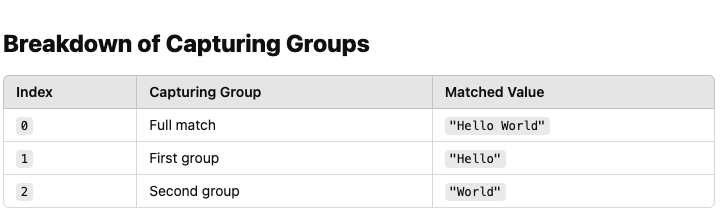

In [37]:
print(match.group(1, 2))  # Output: ('Hello', 'World')


('Hello', 'World')


In [38]:
match = re.search("(Hello) (World)", "Goodbye Universe!")
print(match)  # Output: None
print(match.group(1))  # ❌ Error: 'NoneType' object has no attribute 'group'


None


AttributeError: 'NoneType' object has no attribute 'group'

In [32]:
match = re.search("(hello) (world)", "Hello World!", re.IGNORECASE)
print(match.group(1))  # Output: Hello
print(match.group(2))  # Output: World


Hello
World


In [41]:
# An example with groups

# Suppose we have a text string consisting of decimal numbers one per line
# and we wish to break it up into the integer part and the decimal part.
# This can be done via groups that are demarcated by '( )' in the regular 
# expression

num_str = '''1.23
12.356
100.78963
.42
3.1412
83.92837
'''

p1 = re.compile( r'(\d*)\.(\d*)' )
for m in p1.finditer(num_str): # re.finditer() returns an iterator of match objects, allowing us to process all matches in the string.
    print(m)
    print( "Group 0: {0}, Group 1: {1}, Group 2 : {2}".format( m.group(0), m.group(1), m.group(2) ) )
    
print("\n")


<re.Match object; span=(0, 4), match='1.23'>
Group 0: 1.23, Group 1: 1, Group 2 : 23
<re.Match object; span=(5, 11), match='12.356'>
Group 0: 12.356, Group 1: 12, Group 2 : 356
<re.Match object; span=(12, 21), match='100.78963'>
Group 0: 100.78963, Group 1: 100, Group 2 : 78963
<re.Match object; span=(22, 25), match='.42'>
Group 0: .42, Group 1: , Group 2 : 42
<re.Match object; span=(26, 32), match='3.1412'>
Group 0: 3.1412, Group 1: 3, Group 2 : 1412
<re.Match object; span=(33, 41), match='83.92837'>
Group 0: 83.92837, Group 1: 83, Group 2 : 92837




The $(?P<name>...)$ syntax in Python's re module is used for named capturing groups. It allows us to assign a name  to a capturing group, making it easier to reference.

In [34]:
# Groups can also be named, this is Python specific

p2 = re.compile( r'(?P<Int>\d*)\.(?P<Frac>\d*)' )
for m in p2.finditer(num_str):
    # Groups are returned as a dictionary which can be indexed via the specified names.
    print( m['Int'], m['Frac'] )



1 23
12 356
100 78963
 42
3 1412
83 92837


## Using Regular Expressions in Pandas

- Once you know how regular expressions work, it's fairly straightofrward to use them in pandas. A number of string functions will accept regular expressions as input.

- We also get the benefit of vectorization, i.e. the functions are called once per entry in the series.

- For further details, please see the [Working with text data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) section in the pandas user guide.

In [42]:
# Previous example on a pandas series

import numpy as np
import pandas as pd

narr = np.random.randint(0,100, 10) + np.random.rand(10)
narr = narr.astype('str')

data = pd.Series( narr, dtype='string' )
print(data)

# The following syntax uses named groups, this syntax is specific to Python
data.str.extractall( r'(?P<Int>\d*)\.(?P<Frac>\d*)' )

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0    3.9845460025841346
1     75.03892518982853
2      82.5240835597419
3     82.76367670014234
4     65.95090157118028
5    30.573801235089597
6     80.43633176384877
7     32.48590462577794
8    60.706003733316656
9     90.37977443517995
dtype: string


,,Int,Frac
,match,,
0,0,3,9845460025841346
1,0,75,03892518982853
2,0,82,5240835597419
3,0,82,76367670014234
4,0,65,95090157118028
5,0,30,573801235089597
6,0,80,43633176384877
7,0,32,48590462577794
8,0,60,706003733316656


## Exercise

1. Listed below are some regular expressions (some we have already seen). What kinds of strings will they match? Try them out on sample strings.

    - `r"[,\r\n]+"`
    - `r"([a-zA-Z0-9_]+)@"`
    - `r"\(\d\d\d\) \d\d\d-?\d\d\d\d"`
    - `r"[0-9]?[0-9]:[0-9][0-9]"`
    - `r"^.+"` (assume matching at the beginning of a string)


2. Recall the Calgary Historical Rainfall dataset. Use a regular expression to parse out month and date from the `TIMESTAMP` column into separate columns.
